### 허깅페이스(Hugging Face)

In [2]:
'''
허깅페이스(Hugging Face)에서는 "datasets" 패키지를 지원하여 자연어 처리에 활용되는 다양한 데이터셋을 제공하고 있습니다.
허깅페이스 뿐만 아니라 텐서플로우(Tensorflow), 파이토치(PyTorch)에서도 데이터를 제공하고 있습니다. 
'''

from datasets import list_datasets 

all_datasets = list_datasets()
print(f'{len(all_datasets):,}개의 데이터셋이 존재합니다.')

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


16,226개의 데이터셋이 존재합니다.


In [2]:
"""
emotion 데이터셋은 text, label, label_text로 구성되어 있습니다. 
text는 텍스트, 즉, 문장이 들어가 있고, label은 0, 1 등과 같은 값이 입력되어 있습니다.
label_text는 0이 어떤 감정을 의미하는지를 나타냅니다. (e.g., sadness, anger, love)

for example:
    {'text': ['i didnt feel humiliated',
    'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
    'im grabbing a minute to post i feel greedy wrong'],
    'label': [0, 0, 3],
    'label_text': ['sadness', 'sadness', 'anger']}

"""

from datasets import load_dataset 

# emotions = load_dataset('emotion')
emotions = load_dataset('SetFit/emotion')

Using custom data configuration SetFit--emotion-a4cde36e64166129
Found cached dataset json (/root/.cache/huggingface/datasets/SetFit___json/SetFit--emotion-a4cde36e64166129/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
100%|██████████| 3/3 [00:00<00:00, 899.74it/s]


In [4]:
train_ds = emotions['train']

print(f'train column names: {train_ds.column_names}')
print(f'train features: {train_ds.features}')

train column names: ['text', 'label', 'label_text']
train features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None), 'label_text': Value(dtype='string', id=None)}


In [62]:
import pandas as pd 

emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


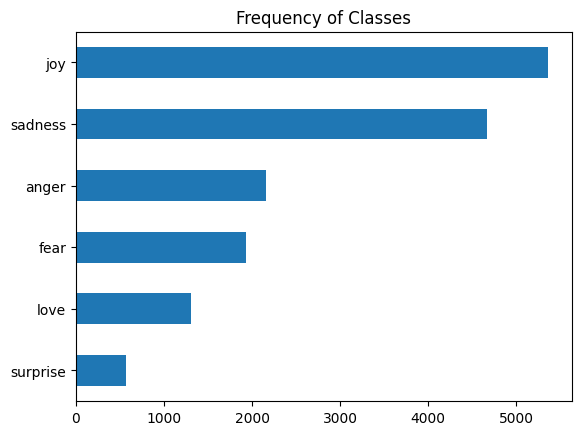

In [6]:
import matplotlib.pyplot as plt 


df['label_text'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

### 최대 문장의 길이 확인

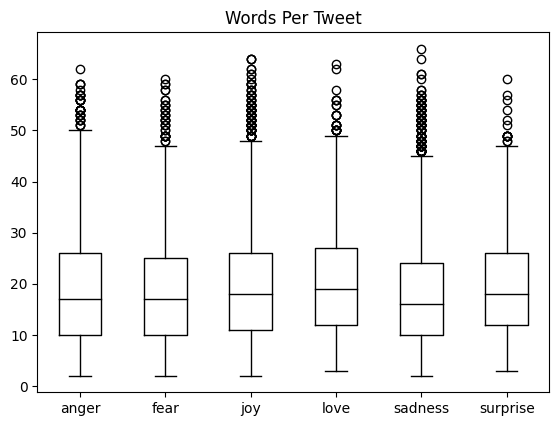

In [17]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_text', grid=False, showfliers=False, color='black')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [19]:
emotions.reset_format()

### 외부 데이터 호출

In [ ]:
# emotion_local = load_dataset('csv', data_files='train.txt', sep=';', names=['text', 'label'])
# csv, text, json 등의 파일을 호출할 수 있습니다.

### 문자 토큰화(Character Tokenization)

In [21]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [24]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [27]:
'''
문장의 토큰화는 자연어 처리에서 가장 필수적인 요소입니다. 
기계는 문자를 입력으로 사용하지 않기 때문에, 문자를 숫자로 변환하는 과정이 필요하며, 
문자를 숫자로 변환한 input_ids를 모델의 입력으로 사용합니다.
'''


input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [28]:
categorical_df = pd.DataFrame(
    {'Name': ['Bumblebee', 'Optimus Prime', 'Megatron'], 'Label ID': [0, 1, 2]}
)

In [30]:
'''
다음 방식은 더미 변수화 하는 방식입니다. 
각 카테고리에 해당하는 인덱스만 1의 값을 가지고 나머지 인덱스는 0의 값을 가지는
원-핫 벡터로 변환하는 것입니다.
'''

pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [31]:
import torch 
import torch.nn.functional as F 

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [33]:
one_hot_encodings[:10]

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### 단어 토큰화(Word Tokenization)

In [35]:
'''
자연어 처리에서는 이와 같이 공백을 기준으로 분할을 하는 방식도 있으며,
Lemmatization, Stemming과 같은 기법도 존재합니다. 
공백을 기준으로 분할하기 전 불용어를 제거하는 등의 작업을 수행하여야 합니다.
'''

tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


### 부분단어 토큰화(Subword Tokenization)

In [3]:
'''
트랜스포머 패키지는 다양한 사전 학습된(Pre-Trained) 모델을 지원하고 있습니다. 
부분단어 즉, Subword tokenizer 같은 경우 BERT, DistillBERT에서 사용되는 WordPiece가 있으며,
model_name_or_path 를 지정해 호출하면 사전 학습된 모델을 쉽게 사용할 수 있습니다.

model_name_or_path: distilbert-base-uncased
위 모델 이름을 통해 어떤 모델인지 유추할 수 있습니다. 맨 앞에 오는 값은 모델의 이름, 가운데 base는 모델의 hidden_dim 등과 같은 값들을 통해 분류됩니다.
Bert의 경우 tiny, base, large 등으로 구성되어 있습니다.
마지막 uncased는 대문자를 전부 소문자로 변환한다는 것을 의미합니다. 
만약 개체명인식(Named Entity Recognition)을 수행하고자 한다면, cased로 사용하여야 합니다.
'''

from transformers import AutoTokenizer

model_name_or_path = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

In [ ]:
from transformers import DistilBertTokenizer, BertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_name_or_path)
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [37]:
'''
Bert는 기본적으로 input_ids, attention_mask를 출력합니다.
input_ids는 입력 문장을 토큰으로 변환한 것을 의미하고, attention_mask는 어디에 집중할 것인지를 의미합니다.
예를 들어, 입력 문장의 길이가 10이라고 할 때 실제 입력 문장의 길이는 3인 경우 나머지는 0으로 패딩(Padding)할 것입니다. 
그렇다면 패딩된 부분은 계산할 필요가 없기 때문에 attention_mask는 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]으로 출력이 됩니다.
'''

encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [38]:
'''
[CLS], [SEP] 토큰은 스페셜 토큰으로, 문장의 시작과 끝을 나타냅니다.
default로 설정이 되어 있기 때문에 별도로 문장 앞뒤에 입력해주지 않아도 됩니다. 
##izing으로 표시된 부분은 단어의 앞이 공백으로 되어 있지 않다는 것을 의미합니다. 
즉, 앞에 단어와 이어져 있었지만, 부분단어로 분리되었다는 것을 의미합니다. 
'''
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [39]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [44]:
print(f'Vocabulary Size: {tokenizer.vocab_size:,}')
print(f'Max Length: {tokenizer.model_max_length}')

Vocabulary Size: 30,522
Max Length: 512


### 텍스트 분류(Text Classification)

In [4]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [5]:
'''
[PAD]: 0
[UNK]: 100
[CLS]: 101
[SEP]: 102
[MASK]: 103
'''

print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [6]:
emotion_encoded = emotions.map(tokenize, batched=True, batch_size=None)

100%|██████████| 1/1 [00:00<00:00,  8.51ba/s]


In [7]:
from transformers import AutoModel 
import torch 

model_ckpt = 'distilbert-base-uncased'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
text = "this is a test"
inputs = tokenizer(text, return_tensors='pt') # return_tensors='pt'로 지정하는 경우 tensor로 반환됩니다. 

inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1564, -0.1862,  0.0527,  ..., -0.1188,  0.0663,  0.5469],
         [-0.3570, -0.6484, -0.0618,  ..., -0.3037,  0.3507,  0.5219],
         [-0.2767, -0.4461,  0.1818,  ..., -0.0948, -0.0078,  0.9956],
         [-0.2835, -0.3919,  0.3749,  ..., -0.2149, -0.1170,  1.0524],
         [ 0.2663, -0.5093, -0.3182,  ..., -0.4204,  0.0144, -0.2151],
         [ 0.9444,  0.0111, -0.4720,  ...,  0.1440, -0.7283, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [9]:
'''
Bert의 경우 last_hidden_state 즉, 각 hidden_state에 대한 값이 출력됩니다. 
입력 문장의 길이가 6이었기 때문에 각 단어에 대한 hidden_state 값이 출력되는 것입니다.
분류 작업의 경우 [CLS] 토큰을 주로 사용하기 때문에 첫 번째 토큰에 대한 값을 출력해서 가지고 옵니다. 
'''

print(outputs.last_hidden_state.size())

torch.Size([1, 6, 768])


In [10]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state 
    
    return {'hidden_state':last_hidden_state[:,0].cpu().numpy()}

In [11]:
emotion_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [12]:
emotion_encoded['train'].column_names

['text', 'label', 'label_text', 'input_ids', 'attention_mask']

In [13]:
emotions_hidden = emotion_encoded.map(extract_hidden_states, batched=True)

100%|██████████| 2/2 [00:00<00:00,  2.44ba/s]


In [14]:
emotions_hidden['train'].column_names

['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden_state']

In [15]:
import numpy as np 

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [17]:
import pandas as pd 

In [18]:
# pip install umap-learn
'''
MinMaxScaler는 값을 0과 1사이로 정규화 하기 위해 사용합니다.
UMAP의 경우 차원 축소 기법 중 하나입니다. 대표적인 기법으로는 PCA, t-SNE 등이 있으며, 
그 중 다양체(Manifold) 구조인 경우 UMAP의 성능이 가장 좋은 것으로 알려져 있습니다.
'''

from umap import UMAP 
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)

mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled) 

df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])

df_emb['label'] = y_train 

df_emb.head()

,X,Y,label
0,4.461787,6.709779,0
1,-2.860630,6.535885,0
2,5.138533,3.041643,3
3,-2.110693,4.146441,2
4,-3.314556,4.257465,3


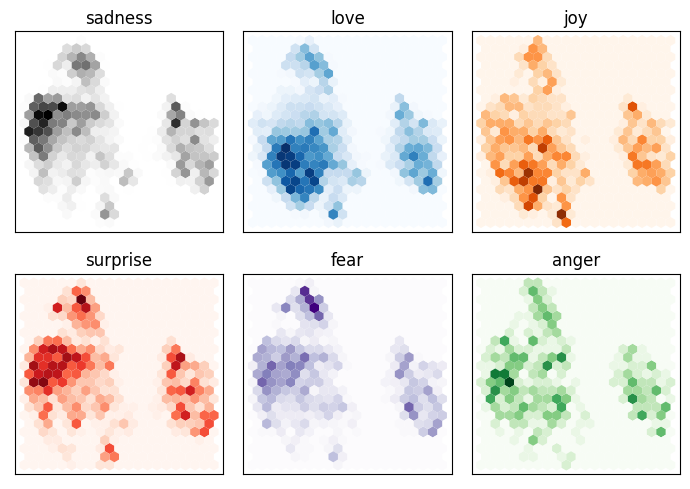

In [35]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = set(emotions['train']['label_text'])

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f'label== {i}')
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

### 간단한 모델 구축

In [37]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [38]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

### 트랜스포머 모델 구축

In [40]:
model_ckpt

'distilbert-base-uncased'

In [41]:
'''
AutoModel과 AutoModelForSequenceClassification 간의 차이는 마지막에 분류 헤드가 있는지 없는지에 따라 다릅니다. 
AutoModel을 구축하는 경우 BertClassifier와 같은 새로운 클래스(Class)를 선언해서 마지막 분류 헤드를 구축하여야 합니다. 
반면에, AutoModelForSequenceClassification은 별도의 분류 헤드 구축 없이 num_labels를 지정하면 알아서 분류 헤드를 구축합니다. 
'''

from transformers import AutoModelForSequenceClassification

num_labels = 6 
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier

In [42]:
from sklearn.metrics import accuracy_score, f1_score 

def compute_metrics(pred):
    labels = pred.label_ids 
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {'accuracy':acc, 'f1':f1}

In [ ]:
# from huggingface_hub import notebook_login

# notebook_login()
# Jupyter나 Colab을 사용하게 되면 사용할 수 있습니다.

In [45]:
from transformers import Trainer, TrainingArguments

In [49]:
batch_size = 64 
logging_steps = len(emotion_encoded['train']) // batch_size 
model_name_or_path = f'{model_ckpt}-finetuned-emotion'
training_args = TrainingArguments(output_dir=model_name_or_path, 
                                  num_train_epochs=2, 
                                  learning_rate=2e-5, 
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size, 
                                  weight_decay=0.01, 
                                  evaluation_strategy='epoch', 
                                  disable_tqdm=True, 
                                  logging_steps=logging_steps, 
                                  push_to_hub=False, 
                                  save_strategy='epoch', 
                                  load_best_model_at_end=True, 
                                  log_level='error')

In [50]:
trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics, 
                  train_dataset=emotion_encoded['train'], 
                  eval_dataset=emotion_encoded['validation'], 
                  tokenizer=tokenizer)

trainer.train()

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


{'loss': 0.8272, 'learning_rate': 1e-05, 'epoch': 1.0}
{'eval_loss': 0.3089030086994171, 'eval_accuracy': 0.909, 'eval_f1': 0.9063735157386356, 'eval_runtime': 1.0144, 'eval_samples_per_second': 1971.569, 'eval_steps_per_second': 31.545, 'epoch': 1.0}
{'loss': 0.2416, 'learning_rate': 0.0, 'epoch': 2.0}
{'eval_loss': 0.21667590737342834, 'eval_accuracy': 0.922, 'eval_f1': 0.9222151240051379, 'eval_runtime': 1.0092, 'eval_samples_per_second': 1981.751, 'eval_steps_per_second': 31.708, 'epoch': 2.0}
{'train_runtime': 56.7827, 'train_samples_per_second': 563.552, 'train_steps_per_second': 8.806, 'train_loss': 0.5344012680053711, 'epoch': 2.0}


TrainOutput(global_step=500, training_loss=0.5344012680053711, metrics={'train_runtime': 56.7827, 'train_samples_per_second': 563.552, 'train_steps_per_second': 8.806, 'train_loss': 0.5344012680053711, 'epoch': 2.0})

In [51]:
pred_output = trainer.predict(emotion_encoded['validation'])

In [53]:
pred_output.metrics

{'test_loss': 0.21667590737342834,
 'test_accuracy': 0.922,
 'test_f1': 0.9222151240051379,
 'test_runtime': 1.2827,
 'test_samples_per_second': 1559.227,
 'test_steps_per_second': 24.948}

In [54]:
y_preds=np.argmax(pred_output.predictions, axis=1)

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.title('Normalized confusion matrix')
    plt.show()

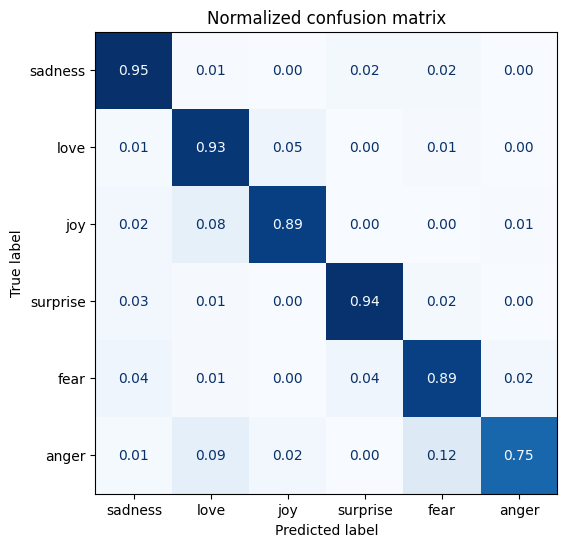

In [58]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [59]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    inputs = {k:v.to(device) for k, v in batch.items() for k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch['label'].to(device), reduction='none')

    return {'loss':loss.cpu().numpy(), 'predicted_label':pred_label.cpu().numpy()}

In [90]:
emotion_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

emotion_encoded['validation'] = emotion_encoded['validation'].map(forward_pass_with_label, batched=True, batch_size=16)

100%|██████████| 125/125 [00:01<00:00, 84.97ba/s] 


In [91]:
def label_int2str(row):
    dic = {v:k for v, k in enumerate(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}
    return dic[row]

In [92]:
emotion_encoded.set_format('pandas')

cols = ['text', 'label', 'predicted_label', 'loss']

df_test = emotion_encoded['validation'][:][cols]

df_test['label'] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = df_test['predicted_label'].apply(label_int2str)

In [97]:
df_test

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,joy,1.578807
1,i feel like i am still looking at a blank canv...,sadness,joy,1.578807
2,i feel like a faithful servant,love,joy,2.161858
3,i am just feeling cranky and blue,anger,joy,2.482316
4,i can have for a treat or if i am feeling festive,joy,joy,1.013623
...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,joy,1.538883
1996,i constantly worry about their fight against n...,joy,joy,1.041766
1997,i feel its important to share this info for th...,joy,joy,1.017602
1998,i truly feel that if you are passionate enough...,joy,joy,1.030601


In [ ]:
# trainer.push_to_hub(commit_message='Training completed!')